In [88]:
#load dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [89]:
#load dataset
df = pd.read_csv('clean_dataset1.csv')

In [90]:
df.head(3)

,UserId,invoiceNo,InvoiceDate,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,AmountSpent,Country
0,1,6396412,2/20/2019,478989,SET OF 6 T-LIGHTS SANTA,3,8,24,United Kingdom
1,1,6396412,2/20/2019,486633,REGENCY TEAPOT ROSES,3,27,82,United Kingdom
2,369201,6397391,2/20/2019,494781,SET OF 6 RIBBONS PARTY,18,3,71,United Kingdom


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4959 entries, 0 to 4958
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   UserId                  4959 non-null   int64 
 1   invoiceNo               4959 non-null   int64 
 2   InvoiceDate             4959 non-null   object
 3   ItemCode                4959 non-null   int64 
 4   ItemDescription         4959 non-null   object
 5   NumberOfItemsPurchased  4959 non-null   int64 
 6   CostPerItem             4959 non-null   int64 
 7   AmountSpent             4959 non-null   int64 
 8   Country                 4959 non-null   object
dtypes: int64(6), object(3)
memory usage: 348.8+ KB


In [92]:
df.sort_values('InvoiceDate', inplace=True)

In [93]:
df['InvoiceDate'].max()

'9/9/2018'

In [94]:
#convert column to date time in order to find the max date and min date
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [95]:
df.sort_values('InvoiceDate', inplace= True)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4959 entries, 4956 to 0
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   UserId                  4959 non-null   int64         
 1   invoiceNo               4959 non-null   int64         
 2   InvoiceDate             4959 non-null   datetime64[ns]
 3   ItemCode                4959 non-null   int64         
 4   ItemDescription         4959 non-null   object        
 5   NumberOfItemsPurchased  4959 non-null   int64         
 6   CostPerItem             4959 non-null   int64         
 7   AmountSpent             4959 non-null   int64         
 8   Country                 4959 non-null   object        
dtypes: datetime64[ns](1), int64(6), object(2)
memory usage: 387.4+ KB


In [96]:
df.head(2)

,UserId,invoiceNo,InvoiceDate,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,AmountSpent,Country
4956,1,5901984,2018-02-12,482160,JAM MAKING SET WITH JARS,21,11,245,United Kingdom
4950,1,5901984,2018-02-12,744891,SET OF 3 BIRD LIGHT PINK FEATHER,3,3,10,United Kingdom


In [99]:
user_df = df.drop_duplicates('UserId', keep ='last').reset_index(drop=True)
user_df.head(4)

,UserId,invoiceNo,InvoiceDate,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,AmountSpent,Country
0,378231,5902567,2018-02-12,477351,3D CHRISTMAS STAMPS STICKERS,3,1,5,United Kingdom
1,368508,5900301,2018-02-12,451164,CHICK GREY HOT WATER BOTTLE,36,4,171,United Kingdom
2,377328,5901104,2018-02-12,446460,FIRST AID TIN,3,4,13,United Kingdom
3,333102,5900411,2018-02-12,1764630,ENGLISH ROSE HOT WATER BOTTLE,3,5,17,United Kingdom


In [104]:
#finding the recency of each customer in respect '2019-02-20 00:00:00'
user_df['Recency'] = pd.to_datetime(user_df['InvoiceDate'].max()) - pd.to_datetime(user_df['InvoiceDate'])

In [114]:
user_df.head(3)

,UserId,invoiceNo,InvoiceDate,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,AmountSpent,Country,Recency
0,378231,5902567,2018-02-12,477351,3D CHRISTMAS STAMPS STICKERS,3,1,5,United Kingdom,373
1,368508,5900301,2018-02-12,451164,CHICK GREY HOT WATER BOTTLE,36,4,171,United Kingdom,373
2,377328,5901104,2018-02-12,446460,FIRST AID TIN,3,4,13,United Kingdom,373


In [115]:
#Extracting only the day value 
#to remove the days 
user_df['Recency'] = user_df['Recency'].dt.days


In [117]:
user_df = user_df[['UserId', 'Recency']]
user_df.head(3)

,UserId,Recency
0,378231,373
1,368508,373
2,377328,373


In [119]:
user_df['Recency'].max()

373

(array([512., 305., 184., 141., 135., 109., 108.,  85.,  84.,  79.]),
 array([  0. ,  37.3,  74.6, 111.9, 149.2, 186.5, 223.8, 261.1, 298.4,
        335.7, 373. ]),
 <BarContainer object of 10 artists>)

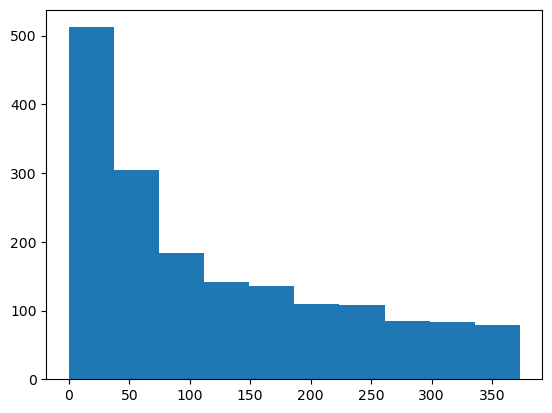

In [121]:
#Plot the graph of customers recency
#Graph shows that 500 customers made purchase between 0 -30days 
#While 100 customers made purchase between 350 - 373 days 
plt.hist(user_df['Recency'])

## To find the purchase frequency of customers

In [126]:
#Getting the frequency distribution of each customerid
df_frequency = df['UserId'].value_counts().reset_index()
df_frequency.columns = ['UserId', 'Frequency']
df_frequency.head()

,UserId,Frequency
0,1,1175
1,374661,69
2,296016,51
3,267708,43
4,313131,39


In [128]:
#Merge thi data to our main dataframe
user_df = pd.merge(user_df, df_frequency, on = 'UserId')

In [131]:
user_df.tail(3)

,UserId,Recency,Frequency
1739,334110,0,6
1740,331884,0,6
1741,1,0,1175


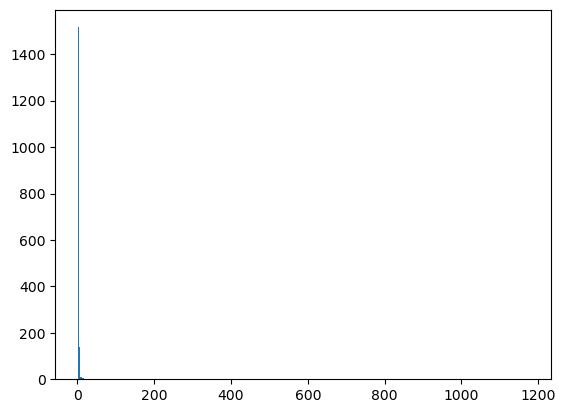

In [133]:
#Plotting a histogram
plt.hist(user_df['Frequency'], bins = 500);

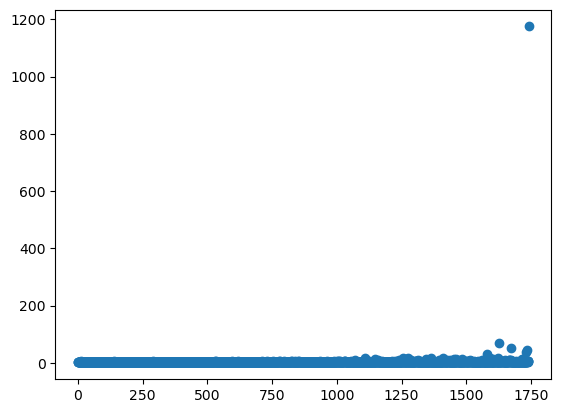

In [134]:
#Plotting a scatter plot
plt.scatter(range(user_df.shape[0]), user_df['Frequency'])

In [135]:
range(user_df.shape[0])

range(0, 1742)

## Finding monetary value of customers

In [136]:
df.head(3)

,UserId,invoiceNo,InvoiceDate,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,AmountSpent,Country
4956,1,5901984,2018-02-12,482160,JAM MAKING SET WITH JARS,21,11,245,United Kingdom
4950,1,5901984,2018-02-12,744891,SET OF 3 BIRD LIGHT PINK FEATHER,3,3,10,United Kingdom
4945,378231,5902567,2018-02-12,477351,3D CHRISTMAS STAMPS STICKERS,3,1,5,United Kingdom


In [137]:
df_amount = df.groupby('UserId')['AmountSpent'].sum().reset_index()

In [138]:
df_amount.rename(columns = {"AmountSpent": "Revenue"}, inplace = True)

In [139]:
df_amount.head()

,UserId,Revenue
0,1,86716
1,259287,54
2,259329,246
3,259392,331
4,259434,73


In [140]:
#merge this data to our main dataframe
user_df = pd.merge(user_df, df_amount, on= 'UserId')

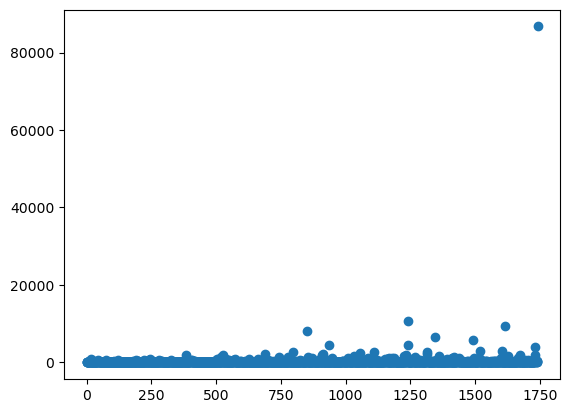

In [145]:
#plt.scatter(range(user_df.shape[0]), user_df['Revenue'])
plt.scatter(range(user_df.shape[0]), user_df['Revenue'])

In [147]:
user_df.head(2)

,UserId,Recency,Frequency,Revenue
0,378231,373,1,5
1,368508,373,1,171


<AxesSubplot:>

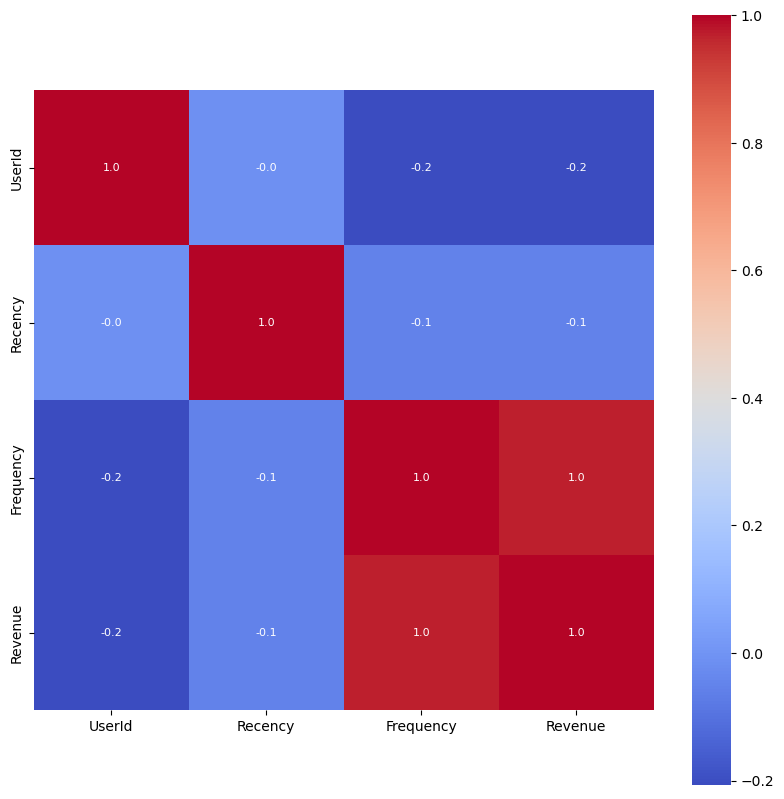

In [148]:
correlation = user_df.corr()
#Constructing a heatmap to understand the correlation
plt.figure(figsize=(10, 10))
sns.heatmap(correlation,cbar=True, square =True,fmt='.1f', annot=True, annot_kws={'size':8}, cmap='coolwarm')

In [149]:
user_df.to_csv('userData.csv')